In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time

In [2]:
# the data here is the original data with 12 month momentum and 36m Volatility
# the filtering of this part of the data was done in Low-vol v3
# Note we use PERMNO because we are forming portfolio and tracking portfolio returns, we are not that concerned
# about company specific risk, nor we would like to analyse company financial performance
data = pd.read_csv('new data.csv', low_memory=False, index_col=0)
data['date'] = data['date'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d'))
data

C:\Users\Lance\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,PERMNO,date,DIVAMT,PRC,SHROUT,Mkt Cap,12m Vol,24m Vol,36m Vol,12m Mom,24m Mom,36m Mom,Mkt Beta,Snp Beta,Skewness
0,10000,1985-12-31,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10000,1986-01-31,0.000000,4.37500,3680.0,1.610000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10000,1986-02-28,0.000000,3.25000,3680.0,1.196000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000,1986-03-31,0.000000,4.43750,3680.0,1.633000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10000,1986-04-30,0.000000,4.00000,3793.0,1.517200e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10000,1986-05-31,0.000000,3.10938,3793.0,1.179388e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10000,1986-06-30,0.000000,3.09375,3793.0,1.173459e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10000,1986-07-31,0.000000,2.84375,3793.0,1.078634e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10000,1986-08-31,0.000000,1.09375,3793.0,4.148594e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10000,1986-09-30,0.000000,1.03125,3793.0,3.911531e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Record the starting and ending dates of each stocks
# Note that the dates you get here are just dates without filtering nan values, they will be filtered later
cur_tic = data['PERMNO'][0]
start_ind = 0
dates_ind = {}
dates = {}
start_time = time.time()

def strtodatetime(string):
    datetime.strptime(string)

for i in range(len(data)):
    if data['PERMNO'][i]==cur_tic:
        pass
    else:
        dates_ind.update({cur_tic:[start_ind, i-1]})
        dates.update({cur_tic:[data['date'][start_ind],data['date'][i-1]]})
        start_ind=i
        cur_tic = data['PERMNO'][i]
        
dates_ind.update({cur_tic:[start_ind, i]})
dates.update({cur_tic:[data['date'][start_ind],data['date'][i]]})
print('Run time:',time.time()-start_time)

Run time: 120.50797128677368


In [4]:
# For some stocks, the shares outstanding and the prices may be missing, 
# if so we need to mark the date when they have both price and shares outstanding
#volnan = data['Rolling 36m Vol'].isnull() # True for vol is NaN
#pop_lst = []

#for ticker in dates_ind:
#    # Get the start right
#    si, ei = dates_ind[ticker][0], dates_ind[ticker][1]
#    if volnan[si] and volnan[ei]:
#        pop_lst.append(ticker)
#        continue
#    while(data['PRC'].iloc[si]<0 or data['SHROUT'].iloc[si]<0 or volnan[si]):
#        si+=1
#    while(data['PRC'].iloc[ei]<0 or data['SHROUT'].iloc[ei]<0 or volnan[ei]):
#        ei-=1
#    dates_ind.update({ticker:[si,ei]})
#    dates.update({ticker:[data['date'][si],data['date'][ei]]})
    
#for ticker in pop_lst:
#    dates_ind.pop(ticker)
#    dates.pop(ticker)
#print('Run time: %.2f s. Remained Stocks: %d'%(time.time()-start_time,len(dates_ind)))

In [5]:
# Filter data, get the dates that are used to record each month's share information
# Usually it is just the lat day of the month, from 1963-7-31 to 2018-6-30
head, mid, tail = [], [], []
for i1 in range(1964, 2018):
    for i2 in range(2,13):
        mid.append(datetime.datetime(i1, i2, 1)-datetime.timedelta(days = 1))
    mid.append(datetime.datetime(i1+1, 1, 1)-datetime.timedelta(days = 1))

for i1 in range(8, 13):
    head.append(datetime.datetime(1963, i1, 1)-datetime.timedelta(days = 1))
head.append(datetime.datetime(1964, 1, 1)-datetime.timedelta(days = 1))
    
for i1 in range(2, 8):
    tail.append(datetime.datetime(2018,i1,1)-datetime.timedelta(days = 1))

dates_month = np.array(head+mid+tail) # The index of the data file, in months

In [6]:
start_time = time.time()
stock_components = {}

# feed in one date, find_stocks will save the tickers of the stocks available at that date and return a list of them
def find_stocks(target_date):
    stock_lst = []
    for ticker in dates:
        if dates[ticker][0] <= target_date and dates[ticker][1] >= target_date:
            stock_lst.append(ticker)
    return stock_lst


for i in dates_month:
    stock_components.update({i:find_stocks(i)})
    
print(time.time()-start_time)

22.5115647315979


In [7]:
# Find the components of the portfolio for a given date 
def find_component(date):
    df = data[data['date']==date]
    return df
#start = time.time()
#for month in dates_month[36:]:
    #print(len(find_component(month)),time.time()-start)

In [8]:
# The first part of the strat consists of 3 things:
# 1. Use the most liquid 1000 stocks only
# 2. Half the portfolio by volatility, get the low vol half
# 3. Give scores based on income(dividend) and 12m momentum, take the highest 100 and form a portfolio (weights to be discussed)
# 4. Track the return, turn over, overall vol of the portfolio with the benchmark, which is the S&P

# filter_port_standard takes in a DataFrame of all the stocks thats available in one period. The df can be obtained by find_components
# it returns a sorted DataFrame of the standard sorting methodology given in the book
# Note that even we didn't filter the nan values in the first place, in sorting they will always come after those with true values.
def filter_port(df,
                vol_type,
                mom_type,
                small=False,
                vw=False,
                scale=[1000,[0,500],[0,100]],
                sort_ascending=False,
                div=True):
    
    df = df.dropna(subset=[vol_type])
    # Rank by Mkt Cap and take the largest 1000
    df = df.sort_values(by=['Mkt Cap'],ascending=False)[0:scale[0]]
    
    # Half the 1000 by vol, take the low vol part
    df = df.sort_values(by=[vol_type],ascending=True)[scale[1][0]:scale[1][1]]
    # Give scores based on div and mom
    score_bench = [scale[1][1]-scale[1][0]-i for i in range(scale[1][1]-scale[1][0])]
    df = df.sort_values(by=['DIVAMT'],ascending=False)
    df['Div Score'] = [0]*(scale[1][1]-scale[1][0]) if div==False else score_bench#score_bench
    df = df.sort_values(by=[mom_type], ascending=False)
    df['Mom Score'] = score_bench
    df['Total Score'] = df['Div Score'] + df['Mom Score']
    
    if small==False: #the large one has all the info while the small one only has price
        return df.sort_values(by=['Total Score'], ascending=sort_ascending)[scale[2][0]:scale[2][1]]
    else:
        sorted_df = df.sort_values(by=['Total Score'], ascending=sort_ascending)[scale[2][0]:scale[2][1]]
        if vw==False:
            return pd.DataFrame(sorted_df[['PERMNO','PRC',vol_type,'Mkt Beta','Snp Beta','Skewness']].values, 
                            index=sorted_df['PERMNO'].values, 
                            columns=['PERMNO','PRC',vol_type,'Mkt Beta','Snp Beta','Skewness'])
        else:
            return pd.DataFrame(sorted_df[['PERMNO','PRC','Mkt Cap',vol_type,'Mkt Beta','Snp Beta','Skewness']].values, 
                            index=sorted_df['PERMNO'].values, 
                            columns=['PERMNO','PRC', 'Mkt Cap',vol_type,'Mkt Beta','Snp Beta','Skewness'])
    
frame = find_component(datetime.datetime(2018, 6, 30, 0, 0))
t=filter_port(find_component(dates_month[36]),vol_type='36m Vol',mom_type='12m Mom',small=True,vw=True,scale=[1000,[500,1000],[400,500]])

In [9]:
# Here we stop a while and think about portfolio weights, we have some options here:
# 1. Equally weighted
# 2. ERC contribution
# 3. Weighted based on Total Score
# 4. Introducing extra parameters, i.e. low-beta, skewness to mimic the low vol strat
# First let's do 1 and 3, we can do 2 and 4 with same parameters for comparison
# We first construct a system of calculating portfolio return and turnover, the trading cost can be calculated with turnover

In [10]:
# First we do eqaully weighted

# The Process:
# 0. Start with a starting and ending trading period and initial cash
# 1. Get the weight and price for the current month, calculate the units hold if you are starting
# 2. For the current period return, monitor the change in price and get the portfolio return for that period.
# if the stock doesn't exist anymore, clear the position by fixing the price, hence fixing the return to 0
# 3. When rebalancing port, first calculate the return for this month. Clear the position and renew the portfolio
# Record the difference to calculate the turnover for this rebalancing, i.e how many of the 100 stocks are replaced

############# Some supportive functions #############

# Get the according index of a certain date in dates_month
def get_index(date):
    return int(np.where(np.array(dates_month)==date)[0])
#get_index(datetime.datetime(1966, 7, 31, 0, 0))

# Compare and get the turnover in the portfolio 1 and portfolio 2 by PERMNO
# Return a list that consists of 3 list: PERMNO of stocks in both, only in 1 and only in 2
def compare_ports(df1, df2):
    p1, p2 = df1['PERMNO'].values, df2['PERMNO'].values #p1, p2 are pd.Series of the PERMNO in both portfolio
    ret1, ret2, ret3 = [], [], []
    for i in range(len(p1)):
        if p1[i] in p2:
            ret1.append(p1[i])
        else:
            ret2.append(p1[i])
            
    for i in range(len(p2)):
        if p2[i] not in p1:
            ret3.append(p2[i])
    return [ret1,ret2,ret3]

rets = compare_ports(filter_port(find_component(dates_month[36]),vol_type='36m Vol',mom_type='12m Mom'),filter_port(find_component(dates_month[37]),vol_type='36m Vol',mom_type='12m Mom'))

In [18]:
##################### The loop ###########################################
# Since you are using 36m Vol, we take out the first 36 months and start from 1966-7-31 and end in 2018-6-30
# Suppose Now is the start of month N, I start with equal weights today and hold the portfolio till the last day of the month
# Base on the changes in portfolio values we can calculate the return of the period,
# also, you need to rebalance by selling some stocks, the stocks that you buy in should be equally weighted

start_time = time.time()
def ew_rebalancing(freq, # freq is the rebalancing frequency
                   start,
                   scale,
                   vol_type,
                   mom_type,
                   skew=False,
                   vw=False,
                   show_record=True,
                   div=True
                  ):
    port_v = 1000000
    
    prior =  filter_port(find_component(dates_month[start]),vol_type=vol_type,mom_type=mom_type,vw=vw,small=True,scale=scale)

    if vw==False:
        cur_w = np.array([1/len(prior)]*len(prior))
        cur_v = np.array([port_v/len(prior)]*len(prior))
        prior['Position'] = [port_v/len(prior)]*len(prior)
    else:
        sum_cap = sum(prior['Mkt Cap'])
        mc = prior['Mkt Cap'].values
        cur_w = mc/sum_cap
        cur_v = port_v*cur_w
        prior['Position'] = port_v*cur_w
        
    cur_vol = prior[vol_type].values
    cur_mbeta = prior['Mkt Beta'].values
    cur_sbeta = prior['Snp Beta'].values
    cur_skew = prior['Skewness'].values
    return_record, turnover_record, portv_record = [0], [0], [port_v]
    vol_record, mbeta, sbeta, skews = [sum(cur_vol*cur_w)], [sum(cur_w*cur_mbeta)], [sum(cur_w*cur_sbeta)], [sum(cur_skew*cur_w)]
    
    prior['Weight'] = cur_w
    
    for i in range(start,len(dates_month)-1,1):
        # calculate the changes in portfolio value each month, which is portfolio return
        post = filter_port(find_component(dates_month[i+1]),vol_type=vol_type,mom_type=mom_type,small=True,vw=vw,scale=scale,div=div)
        post_comp = find_component(dates_month[i+1]).dropna(subset=['Mkt Cap']) #this is the components of portfolio next month

        # get the returns of all the components of the portfolio in month N
        # if there is no valid price for the stock, use 0 for return
        cur_return = []
        for ticker in prior['PERMNO']:
            values = post_comp['PERMNO'].values
            if ticker in values:
                tar_stock_prior = prior[prior['PERMNO']==ticker]
                tar_stock_post = post_comp[post_comp['PERMNO']==ticker]
                try:
                    stock_return = (int(tar_stock_post['PRC'])-int(tar_stock_prior['PRC']))/int(tar_stock_prior['PRC'])
                except:
                    if show_record:
                        print('Invalid Stock price encountered at %.10s'%(dates_month[i-1]))
                    stock_return = 0
            else:
                stock_return = 0
            cur_return.append(stock_return)
        prior['Period Return'] = cur_return
        period_return = sum(prior['Period Return']*prior['Weight'])
        return_record.append(period_return)
        rets = compare_ports(prior, post)
        
        # Now we do rebalancing, first we 
        # 1. Sell the stocks that is not in the portfolio of month N+1
        port_v *= (1+period_return)
        prior['Post Position'] = prior['Position']*(1+prior['Period Return'])
        cash = sum(prior.loc[rets[1]]['Post Position'].values)
        if show_record:
            print('%.10s, cash = %d, portfolio value = %d, period return= %.2f'%(dates_month[i], cash, port_v, period_return))
        # 2. After that, we use the cash we get from selling and buy in new stocks with equal weights
        if vw:
            post_only = post.loc[rets[2]]
            mc_sum_new = sum(post_only['Mkt Cap'])
            w_new = pd.Series([(mc/mc_sum_new)*cash/port_v for mc in post_only['Mkt Cap']],index=post_only['PERMNO'])
            position_new = port_v*w_new
        else:
            position_new = cash/len(rets[1])
            
        post['Position'] = [np.nan]*int(scale[2][1]-scale[2][0])
        # 3. Calculate the weights for all the stocks in the rebalanced portfolio
        if vw:
            post['Position'] = [position_new[ticker] if ticker in rets[2] else prior['Post Position'].loc[ticker] for ticker in post['PERMNO'].values]
        else:
            post['Position'] = [position_new if ticker in rets[2] else prior['Post Position'].loc[ticker] for ticker in post['PERMNO'].values]
        #cur_w = [post['Position'].loc[ticker]/port_v for ticker in post['PERMNO'].values]
        cur_w = post['Position']/port_v
        post['Weight'] = cur_w
        # 4. Record portfolio value, weights and turnover
        turnover_record.append(len(rets[1])/(len(rets[0])+len(rets[1])))
        portv_record.append(port_v)
        vol_record.append(sum(post[vol_type].values*cur_w))
        mbeta.append(sum(post['Mkt Beta'].values*cur_w))
        sbeta.append(sum(post['Snp Beta'].values*cur_w))
        skews.append(sum(post['Skewness'].values*cur_w))
        # At last, move a step forward and assign the post to prior
        prior = post.copy()
    vol_record, mbeta, sbeta, skews = np.array(vol_record), np.array(mbeta), np.array(sbeta), np.array(skews)
    return [return_record, np.average(turnover_record), portv_record, np.average(vol_record[~np.isnan(vol_record)]), 
            np.average(mbeta[~np.isnan(mbeta)]), np.average(sbeta[~np.isnan(sbeta)]), np.average(skews[~np.isnan(skews)])]

In [53]:
#start_time = time.time()
#a = ew_rebalancing(1,36,[1000,[0,500],[0,100]],vol_type='36m Vol',mom_type='12m Mom',vw=True,show_record=False,div=True)
#print(time.time()-start_time)

139.53989243507385


In [12]:
# Set up the benchmark and risk-free rate
rmd = pd.read_csv('rf and mkt.csv',index_col=0)
mkt = pd.Series(rmd['Mkt'].values[36:],index=dates_month[36:])
aggret = [1]
for i in range(1,len(mkt)):
    aggret.append(aggret[i-1]*(1+mkt[i]/100))

# Get the risk free rate for Sharpe Ratio,
rf = pd.Series(rmd['RF'].values[36:],index=dates_month[36:])

# Get SNP 500
snp = pd.read_csv('snp.csv',index_col=0)
snp = pd.Series(snp['Close'].values,index=range(len(snp)))
snp /= snp[0]

In [30]:
def get_sharpe(lst):
    d = np.array(lst[0])
    d = d - rf/100
    agg_ret = [1]
    for i in range(1,len(d)):
        agg_ret.append(agg_ret[-1]*(1+d[i]))
    n = int(len(rf)/12)
    er = (agg_ret[-1]**(1/n)-1) # Excess return
    av = lst[3] # average vol
    ev = lst[2][-1]/lst[2][0] #end value
    
    print('Excess Return=%.4f, Avg Vol=%.4f. Sharpe=%.4f. End Value=%.2f. Turnover=%.2f. Beta=%.2f. Skewness=%.2F'%
          (er,av,er/av,ev,lst[1],lst[5],lst[6]))
    return 

def plot_lines(lst,
               leg):
    return

In [13]:
# standard portfolio deciles, value weighted without dividend
deciles_standard_vw_nd = []
start_time = time.time()
for i in range(10):
    if i<=4:
        deciles_standard_vw_nd.append(ew_rebalancing(1,36,[1000,[0,500],[int(i*100),int((i+1)*100)]],vol_type='36m Vol',mom_type='12m Mom',vw=True,show_record=False,div=False))
    else:
        deciles_standard_vw_nd.append(ew_rebalancing(1,36,[1000,[500,1000],[int((i-5)*100),int((i-4)*100)]],vol_type='36m Vol',mom_type='12m Mom',vw=True,show_record=False,div=False))
    print(time.time()-start_time)

141.3953459262848
290.1307783126831
431.8205728530884
573.8605120182037
715.6851267814636
868.7578485012054
1032.3721091747284
1187.129490852356
1328.910264968872
1479.4871335029602


In [23]:
for i in range(10):
    get_sharpe(deciles_standard_vw_nd[i])

Excess Return=0.0290, Avg Vol=0.0445. Sharpe=0.6515. End Value=49.60. Turnover=0.31. Beta=0.01. Skewness=-0.36
Excess Return=0.0006, Avg Vol=0.0422. Sharpe=0.0152. End Value=11.63. Turnover=0.53. Beta=0.01. Skewness=-0.84
Excess Return=-0.0054, Avg Vol=0.0408. Sharpe=-0.1323. End Value=8.49. Turnover=0.58. Beta=0.02. Skewness=-0.83
Excess Return=0.0098, Avg Vol=0.0404. Sharpe=0.2430. End Value=18.72. Turnover=0.53. Beta=0.01. Skewness=-0.79
Excess Return=-0.0142, Avg Vol=0.0433. Sharpe=-0.3275. End Value=5.38. Turnover=0.31. Beta=0.01. Skewness=-0.63
Excess Return=-0.1368, Avg Vol=0.6070. Sharpe=-0.2254. End Value=0.01. Turnover=0.28. Beta=0.01. Skewness=-0.46
Excess Return=-0.0956, Avg Vol=1.1495. Sharpe=-0.0832. End Value=0.06. Turnover=0.48. Beta=0.01. Skewness=-1.08
Excess Return=-0.0313, Avg Vol=1.1056. Sharpe=-0.0283. End Value=2.18. Turnover=0.50. Beta=0.01. Skewness=-1.10
Excess Return=-0.0178, Avg Vol=0.9807. Sharpe=-0.0181. End Value=4.47. Turnover=0.43. Beta=0.01. Skewness=-

In [17]:
# standard portfolio deciles, Equally weighted without dividend
deciles_standard_ew_nd = []
start_time = time.time()
for i in range(10):
    if i<=4:
        deciles_standard_ew_nd.append(ew_rebalancing(1,36,[1000,[0,500],[int(i*100),int((i+1)*100)]],vol_type='36m Vol',mom_type='12m Mom',vw=False,show_record=False,div=False))
    else:
        deciles_standard_ew_nd.append(ew_rebalancing(1,36,[1000,[500,1000],[int((i-5)*100),int((i-4)*100)]],vol_type='36m Vol',mom_type='12m Mom',vw=False,show_record=False,div=False))
    print(time.time()-start_time)

146.91227412223816
289.69826197624207
433.2264940738678
573.2233986854553
715.0797324180603
854.1698548793793
1003.932895898819
1144.4583268165588
1294.4261467456818
1439.2016451358795


In [24]:
for i in range(10):
    get_sharpe(deciles_standard_ew_nd[i])

Excess Return=0.0270, Avg Vol=0.0428. Sharpe=0.6304. End Value=44.83. Turnover=0.31. Beta=0.01. Skewness=0.11
Excess Return=0.0130, Avg Vol=0.0398. Sharpe=0.3266. End Value=21.99. Turnover=0.53. Beta=0.02. Skewness=-0.31
Excess Return=0.0118, Avg Vol=0.0380. Sharpe=0.3093. End Value=20.64. Turnover=0.58. Beta=0.02. Skewness=-0.37
Excess Return=0.0131, Avg Vol=0.0374. Sharpe=0.3503. End Value=22.13. Turnover=0.53. Beta=0.02. Skewness=-0.34
Excess Return=0.0030, Avg Vol=0.0413. Sharpe=0.0737. End Value=13.21. Turnover=0.31. Beta=0.01. Skewness=-0.24
Excess Return=-0.1370, Avg Vol=0.2161. Sharpe=-0.6338. End Value=0.01. Turnover=0.28. Beta=0.01. Skewness=0.02
Excess Return=-0.0617, Avg Vol=0.3175. Sharpe=-0.1942. End Value=0.42. Turnover=0.48. Beta=0.01. Skewness=-0.49
Excess Return=-0.0321, Avg Vol=0.3310. Sharpe=-0.0970. End Value=2.09. Turnover=0.50. Beta=0.01. Skewness=-0.55
Excess Return=-0.0092, Avg Vol=0.2806. Sharpe=-0.0327. End Value=7.02. Turnover=0.43. Beta=0.01. Skewness=-0.49

In [25]:
# standard portfolio deciles, value weighted with dividend
deciles_standard_vw_wd = []
start_time = time.time()
for i in range(10):
    if i<=4:
        deciles_standard_vw_wd.append(ew_rebalancing(1,36,[1000,[0,500],[int(i*100),int((i+1)*100)]],vol_type='36m Vol',mom_type='12m Mom',vw=True,show_record=False,div=True))
    else:
        deciles_standard_vw_wd.append(ew_rebalancing(1,36,[1000,[500,1000],[int((i-5)*100),int((i-4)*100)]],vol_type='36m Vol',mom_type='12m Mom',vw=True,show_record=False,div=True))
    print(time.time()-start_time)

150.76277041435242
297.6635332107544
440.9552204608917
595.3012058734894
747.0677089691162
897.5670976638794
1044.8669998645782
1193.0679428577423
1352.8867716789246
1512.9036881923676


In [31]:
for i in range(10):
    get_sharpe(deciles_standard_vw_wd[i])

Excess Return=-0.0068, Avg Vol=0.0449. Sharpe=-0.1504. End Value=7.91. Turnover=0.26. Beta=0.01. Skewness=-0.94
Excess Return=0.0062, Avg Vol=0.0418. Sharpe=0.1487. End Value=15.52. Turnover=0.46. Beta=0.01. Skewness=-0.87
Excess Return=0.0111, Avg Vol=0.0409. Sharpe=0.2702. End Value=19.91. Turnover=0.50. Beta=0.01. Skewness=-0.65
Excess Return=-0.0104, Avg Vol=0.0399. Sharpe=-0.2604. End Value=6.56. Turnover=0.45. Beta=0.01. Skewness=-0.58
Excess Return=0.0149, Avg Vol=0.0405. Sharpe=0.3679. End Value=24.33. Turnover=0.25. Beta=0.01. Skewness=-0.16
Excess Return=-0.0998, Avg Vol=0.1627. Sharpe=-0.6134. End Value=0.05. Turnover=0.22. Beta=0.01. Skewness=-1.15
Excess Return=-0.0569, Avg Vol=0.1621. Sharpe=-0.3507. End Value=0.55. Turnover=0.39. Beta=0.01. Skewness=-1.13
Excess Return=-0.0368, Avg Vol=0.2664. Sharpe=-0.1381. End Value=1.62. Turnover=0.42. Beta=0.01. Skewness=-0.97
Excess Return=-0.0251, Avg Vol=1.4803. Sharpe=-0.0169. End Value=3.04. Turnover=0.38. Beta=0.01. Skewness=-

In [214]:
for i in range(10):
    get_sharpe(deciles_standard_vw_wd[i])

(-0.00724592167104865, 0.05013178708782299, -0.14453746997598424) 0.2589262820512821 7.707593496072778
(0.005929358855975897, 0.04683830303016761, 0.12659209391418208) 0.4638461538461539 15.296910185258458
(0.011353918101829397, 0.04568848258761492, 0.24850722674049103) 0.5028044871794872 20.215925001183926
(-0.010197332441366558, 0.044457348135768564, -0.2293733852551183) 0.45365384615384613 6.6238504869756705
(0.014659443844017295, 0.04559342911422111, 0.32152536294851414) 0.2523557692307693 24.046021648496147
(-0.10069847265644849, 0.18628981662215546, -0.5405473819360259) 0.2167948717948718 0.04645499663224189
(-0.05725477872199669, 0.18008409658224472, -0.3179335644213776) 0.39330128205128206 0.5339328731598033
(-0.03666344317391346, 0.2832204721656247, -0.12945195272633053) 0.4252884615384615 1.6351977433505758
(-0.02522405004687478, 1.5109133654832942, -0.01669457072994148) 0.38001602564102566 3.0130499709350054
(-0.02185591433231593, 2.5498838304932505, -0.008571337278564612) 0

In [27]:
# standard portfolio deciles, Equally weighted with dividend
deciles_standard_ew_wd = []
start_time = time.time()
for i in range(10):
    if i<=4:
        deciles_standard_ew_wd.append(ew_rebalancing(1,36,[1000,[0,500],[int(i*100),int((i+1)*100)]],vol_type='36m Vol',mom_type='12m Mom',vw=False,show_record=False,div=True))
    else:
        deciles_standard_ew_wd.append(ew_rebalancing(1,36,[1000,[500,1000],[int((i-5)*100),int((i-4)*100)]],vol_type='36m Vol',mom_type='12m Mom',vw=False,show_record=False,div=True))
    print(time.time()-start_time)

148.5104205608368
295.8604576587677
444.0273244380951
586.5673139095306
731.5263645648956
873.2596185207367
1012.1413676738739
1161.6146647930145
1304.1462206840515
1453.9020595550537


In [32]:
for i in range(10):
    get_sharpe(deciles_standard_ew_wd[i])

Excess Return=-0.0026, Avg Vol=0.0428. Sharpe=-0.0607. End Value=9.83. Turnover=0.26. Beta=0.02. Skewness=-0.47
Excess Return=0.0128, Avg Vol=0.0398. Sharpe=0.3225. End Value=21.81. Turnover=0.46. Beta=0.02. Skewness=-0.35
Excess Return=0.0204, Avg Vol=0.0390. Sharpe=0.5238. End Value=32.18. Turnover=0.50. Beta=0.01. Skewness=-0.13
Excess Return=0.0163, Avg Vol=0.0383. Sharpe=0.4256. End Value=26.06. Turnover=0.45. Beta=0.01. Skewness=-0.22
Excess Return=0.0195, Avg Vol=0.0395. Sharpe=0.4951. End Value=30.86. Turnover=0.25. Beta=0.01. Skewness=0.03
Excess Return=-0.0991, Avg Vol=0.1465. Sharpe=-0.6764. End Value=0.05. Turnover=0.22. Beta=0.01. Skewness=-0.59
Excess Return=-0.0554, Avg Vol=0.1344. Sharpe=-0.4123. End Value=0.59. Turnover=0.39. Beta=0.01. Skewness=-0.54
Excess Return=-0.0563, Avg Vol=0.1568. Sharpe=-0.3590. End Value=0.56. Turnover=0.42. Beta=0.01. Skewness=-0.36
Excess Return=-0.0210, Avg Vol=0.3797. Sharpe=-0.0552. End Value=3.78. Turnover=0.38. Beta=0.01. Skewness=-0.

In [215]:
for i in range(10):
    get_sharpe(deciles_standard_ew_wd[i])

(-0.0031933376775789, 0.04800855549406304, -0.06651601250476705) 0.2589262820512821 7.707593496072778
(0.012834011339666995, 0.044890016048774226, 0.2858990142868849) 0.4638461538461539 15.296910185258458
(0.020756947368903766, 0.04380942412079179, 0.4738009637303722) 0.5028044871794872 20.215925001183926
(0.016521234367068427, 0.042854505809121375, 0.38551918999266493) 0.45365384615384613 6.6238504869756705
(0.019663776189521753, 0.044599227166780143, 0.4408994827643195) 0.2523557692307693 24.046021648496147
(-0.09918918270797716, 0.1694867749299623, -0.5852325808250556) 0.2167948717948718 0.04645499663224189
(-0.05556921282645644, 0.15266744143105615, -0.36398862983206026) 0.39330128205128206 0.5339328731598033
(-0.056063629743791754, 0.17353299320714652, -0.3230718764636794) 0.4252884615384615 1.6351977433505758
(-0.02094351028846908, 0.4107497006497085, -0.050988497996082335) 0.38001602564102566 3.0130499709350054
(-0.01941025294312848, 0.5378470964214217, -0.036088793771083) 0.210

In [29]:
start_time = time.time()
# Value Weighted
# With Div
b111 = ew_rebalancing(1,36,[1000,[0,500],[0,250]],vol_type='36m Vol',mom_type='12m Mom',vw=True,show_record=False,div=True) # Lowest 250 with dividend
print(time.time()-start_time)
b112 = ew_rebalancing(1,36,[1000,[0,500],[250,500]],vol_type='36m Vol',mom_type='12m Mom',vw=True,show_record=False,div=True) # Second lowest 250 with dividend
print(time.time()-start_time)
b113 = ew_rebalancing(1,36,[1000,[500,1000],[0,250]],vol_type='36m Vol',mom_type='12m Mom',vw=True,show_record=False,div=True) # Second Highest 250 with dividend
print(time.time()-start_time)
b114 = ew_rebalancing(1,36,[1000,[500,1000],[250,500]],vol_type='36m Vol',mom_type='12m Mom',vw=True,show_record=False,div=True) # Highest 250 vol with dividend
print(time.time()-start_time)

# Without Div
b121 = ew_rebalancing(1,36,[1000,[0,500],[0,250]],vol_type='36m Vol',mom_type='12m Mom',vw=True,show_record=False,div=False) # Lowest 250 without dividend
print(time.time()-start_time)
b122 = ew_rebalancing(1,36,[1000,[0,500],[250,500]],vol_type='36m Vol',mom_type='12m Mom',vw=True,show_record=False,div=False) # Second lowest 250 without dividend
print(time.time()-start_time)
b123 = ew_rebalancing(1,36,[1000,[500,1000],[0,250]],vol_type='36m Vol',mom_type='12m Mom',vw=True,show_record=False,div=False) # Second Highest 50 without dividend
print(time.time()-start_time)
b124 = ew_rebalancing(1,36,[1000,[500,1000],[250,500]],vol_type='36m Vol',mom_type='12m Mom',vw=True,show_record=False,div=False) # Highest 250 vol without dividend
print(time.time()-start_time)

312.9033396244049
636.0350878238678
949.0710732936859
1258.0451810359955
1572.2144150733948
1890.3367674350739
2221.0360355377197
2529.4302480220795


In [33]:
for port in [b111,b112,b113,b114,b121,b122,b123,b124]:
    get_sharpe(port)

Excess Return=0.0051, Avg Vol=0.0431. Sharpe=0.1191. End Value=14.66. Turnover=0.16. Beta=0.01. Skewness=-0.90
Excess Return=-0.0017, Avg Vol=0.0403. Sharpe=-0.0410. End Value=10.36. Turnover=0.17. Beta=0.01. Skewness=-0.45
Excess Return=-0.0787, Avg Vol=0.1783. Sharpe=-0.4412. End Value=0.16. Turnover=0.14. Beta=0.01. Skewness=-1.18
Excess Return=-0.0181, Avg Vol=19.4410. Sharpe=-0.0009. End Value=4.40. Turnover=0.14. Beta=0.01. Skewness=-0.73
Excess Return=0.0102, Avg Vol=0.0428. Sharpe=0.2388. End Value=19.06. Turnover=0.20. Beta=0.01. Skewness=-0.70
Excess Return=-0.0035, Avg Vol=0.0414. Sharpe=-0.0843. End Value=9.40. Turnover=0.19. Beta=0.01. Skewness=-0.73
Excess Return=-0.0975, Avg Vol=0.8851. Sharpe=-0.1101. End Value=0.06. Turnover=0.17. Beta=0.01. Skewness=-0.90
Excess Return=-0.0099, Avg Vol=0.8662. Sharpe=-0.0114. End Value=6.76. Turnover=0.17. Beta=0.01. Skewness=-1.11


In [213]:
for port in [b111,b112,b113,b114,b121,b122,b123,b124]:
    print(get_sharpe(port),port[1],port[2][-1]/port[2][0])

(0.01011245030543928, 0.022214407338720453, 0.4552203509752404) 0.20099999999999998 18.957374151031598
(-0.0033762264232100048, 0.021407744297098675, -0.1577105171079409) 0.19276282051282048 9.459049387320825
(-0.09805467129907874, 0.374295198398359, -0.2619714912685576) 0.17231410256410254 0.05416043266371918
(-0.00995439260373343, 0.3699450335033529, -0.026907761159721617) 0.16589743589743589 6.726490049364245
(0.004703291295575784, 0.02235157671576424, 0.21042324465005735) 0.16341666666666663 14.336562477313452
(-0.0007664391897248546, 0.02096025949291106, -0.036566302529988756) 0.1718333333333333 10.843246670710508
(-0.07839194108330527, 0.09088216533495012, -0.8625668280942516) 0.14086538461538461 0.16513178905505918
(-0.017141795120720893, 7.808351392584048, -0.002195315535748205) 0.1424423076923077 4.622019217680667


In [34]:
start_time = time.time()
# Equally Weighted
# With Div
b211 = ew_rebalancing(1,36,[1000,[0,500],[0,250]],vol_type='36m Vol',mom_type='12m Mom',vw=False,show_record=False,div=True) # Lowest 250 with dividend
print(time.time()-start_time)
b212 = ew_rebalancing(1,36,[1000,[0,500],[250,500]],vol_type='36m Vol',mom_type='12m Mom',vw=False,show_record=False,div=True) # Second lowest 250 with dividend
print(time.time()-start_time)
b213 = ew_rebalancing(1,36,[1000,[500,1000],[0,250]],vol_type='36m Vol',mom_type='12m Mom',vw=False,show_record=False,div=True) # Second Highest 250 with dividend
print(time.time()-start_time)
b214 = ew_rebalancing(1,36,[1000,[500,1000],[250,500]],vol_type='36m Vol',mom_type='12m Mom',vw=False,show_record=False,div=True) # Highest 250 vol with dividend
print(time.time()-start_time)

# Without Div
b221 = ew_rebalancing(1,36,[1000,[0,500],[0,250]],vol_type='36m Vol',mom_type='12m Mom',vw=False,show_record=False,div=False) # Lowest 250 without dividend
print(time.time()-start_time)
b222 = ew_rebalancing(1,36,[1000,[0,500],[250,500]],vol_type='36m Vol',mom_type='12m Mom',vw=False,show_record=False,div=False) # Second lowest 250 without dividend
print(time.time()-start_time)
b223 = ew_rebalancing(1,36,[1000,[500,1000],[0,250]],vol_type='36m Vol',mom_type='12m Mom',vw=False,show_record=False,div=False) # Second Highest 50 without dividend
print(time.time()-start_time)
b224 = ew_rebalancing(1,36,[1000,[500,1000],[250,500]],vol_type='36m Vol',mom_type='12m Mom',vw=False,show_record=False,div=False) # Highest 250 vol without dividend
print(time.time()-start_time)

321.00597405433655
624.8710625171661
935.838885307312
1231.874434709549
1552.3944211006165
1869.008909702301
2170.417732000351
2493.955456018448


In [35]:
for port in [b211,b212,b213,b214,b221,b222,b223,b224]:
    get_sharpe(port)

Excess Return=0.0089, Avg Vol=0.0410. Sharpe=0.2168. End Value=17.80. Turnover=0.16. Beta=0.02. Skewness=-0.35
Excess Return=0.0136, Avg Vol=0.0391. Sharpe=0.3482. End Value=22.78. Turnover=0.17. Beta=0.01. Skewness=-0.12
Excess Return=-0.0834, Avg Vol=0.1534. Sharpe=-0.5439. End Value=0.12. Turnover=0.14. Beta=0.01. Skewness=-0.55
Excess Return=-0.0239, Avg Vol=17.2073. Sharpe=-0.0014. End Value=3.25. Turnover=0.14. Beta=0.01. Skewness=-0.28
Excess Return=0.0179, Avg Vol=0.0408. Sharpe=0.4392. End Value=28.33. Turnover=0.20. Beta=0.01. Skewness=-0.15
Excess Return=0.0077, Avg Vol=0.0391. Sharpe=0.1977. End Value=16.80. Turnover=0.19. Beta=0.01. Skewness=-0.31
Excess Return=-0.1024, Avg Vol=0.3084. Sharpe=-0.3322. End Value=0.04. Turnover=0.17. Beta=0.01. Skewness=-0.31
Excess Return=-0.0112, Avg Vol=0.2500. Sharpe=-0.0447. End Value=6.32. Turnover=0.17. Beta=0.01. Skewness=-0.59


In [212]:
for port in [b211,b212,b213,b214,b221,b222,b223,b224]:
    print(get_sharpe(port),port[1],port[2][-1]/port[2][0])

(0.017696203723581494, 0.021448463302308256, 0.8250569504285676) 0.20099999999999998 27.97746006068805
(0.007945374404409788, 0.020479697917046482, 0.3879634571072641) 0.19276282051282048 16.989549250009823
(-0.10243173393415128, 0.14332726001556673, -0.7146702861899837) 0.17231410256410254 0.042190123195508245
(-0.011185881902500583, 0.12325182675648011, -0.09075631734531246) 0.16589743589743589 6.320845566973142
(0.00867366599126318, 0.021503955650500513, 0.40335211494268947) 0.16341666666666663 17.60241812958545
(0.013864789559508761, 0.02049884538707684, 0.67636929288952) 0.1718333333333333 23.053870386419288
(-0.08343621440328453, 0.08131582107469497, -1.0260760243279325) 0.14086538461538461 0.12449212437976741
(-0.023845495585545273, 6.906200552274066, -0.003452766163544651) 0.1424423076923077 3.2500481906505803


In [216]:
len(b224[3])

624

In [36]:
start_time = time.time()
# Value weighted
# With Div
c111 = ew_rebalancing(1,36,[1000,[0,500],[0,500]],vol_type='36m Vol',mom_type='12m Mom',vw=True,show_record=False,div=True) #lowest 500 with dividend
print(time.time()-start_time)
c112 = ew_rebalancing(1,36,[1000,[500,1000],[0,500]],vol_type='36m Vol',mom_type='12m Mom',vw=True,show_record=False,div=True) #lowest 500 with dividend
print(time.time()-start_time)

# Wihtout Div
c121 = ew_rebalancing(1,36,[1000,[0,500],[0,500]],vol_type='36m Vol',mom_type='12m Mom',vw=True,show_record=False,div=False) # highest 500 vol withoout dividend
print(time.time()-start_time)
c122 = ew_rebalancing(1,36,[1000,[500,1000],[0,500]],vol_type='36m Vol',mom_type='12m Mom',vw=True,show_record=False,div=False) # highest 500 vol without dividend
print(time.time()-start_time)

597.4445381164551
1197.3107182979584
1790.7481307983398
2411.266321659088


In [37]:
for port in [c111,c112,c121,c122]:
    get_sharpe(port)

Excess Return=0.0068, Avg Vol=0.0423. Sharpe=0.1617. End Value=16.03. Turnover=0.05. Beta=0.01. Skewness=-0.53
Excess Return=-0.0403, Avg Vol=39.0890. Sharpe=-0.0010. End Value=1.35. Turnover=0.04. Beta=0.01. Skewness=-0.72
Excess Return=0.0068, Avg Vol=0.0423. Sharpe=0.1617. End Value=16.03. Turnover=0.05. Beta=0.01. Skewness=-0.53
Excess Return=-0.0403, Avg Vol=39.0890. Sharpe=-0.0010. End Value=1.35. Turnover=0.04. Beta=0.01. Skewness=-0.72


In [38]:
start_time = time.time()
# Equally weighted
# With Div
c211 = ew_rebalancing(1,36,[1000,[0,500],[0,500]],vol_type='36m Vol',mom_type='12m Mom',vw=False,show_record=False,div=True) #lowest 500 with dividend
print(time.time()-start_time)
c212 = ew_rebalancing(1,36,[1000,[500,1000],[0,500]],vol_type='36m Vol',mom_type='12m Mom',vw=False,show_record=False,div=True) #lowest 500 with dividend
print(time.time()-start_time)

# Wihtout Div
c221 = ew_rebalancing(1,36,[1000,[0,500],[0,500]],vol_type='36m Vol',mom_type='12m Mom',vw=False,show_record=False,div=False) # highest 500 vol withoout dividend
print(time.time()-start_time)
c222 = ew_rebalancing(1,36,[1000,[500,1000],[0,500]],vol_type='36m Vol',mom_type='12m Mom',vw=False,show_record=False,div=False) # highest 500 vol without dividend
print(time.time()-start_time)

610.5915236473083
1198.247266292572
1793.8268702030182
2381.7583060264587


In [39]:
for port in [c211,c212,c221,c222]:
    get_sharpe(port)

Excess Return=0.0101, Avg Vol=0.0409. Sharpe=0.2471. End Value=18.98. Turnover=0.05. Beta=0.01. Skewness=-0.23
Excess Return=-0.0569, Avg Vol=27.0149. Sharpe=-0.0021. End Value=0.55. Turnover=0.04. Beta=0.02. Skewness=-0.36
Excess Return=0.0101, Avg Vol=0.0409. Sharpe=0.2471. End Value=18.98. Turnover=0.05. Beta=0.01. Skewness=-0.23
Excess Return=-0.0569, Avg Vol=27.0149. Sharpe=-0.0021. End Value=0.55. Turnover=0.04. Beta=0.02. Skewness=-0.36


<function matplotlib.pyplot.show(*args, **kw)>

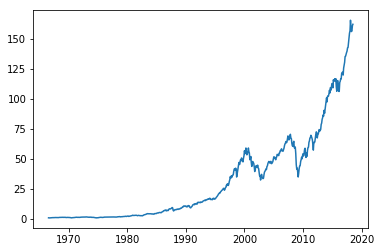

In [41]:
plt.plot(dates_month[36:], agg_ret)
plt.show

In [17]:
returnsa, returnsb, returnsc = pd.Series(a[0], index=dates_month[36:]),pd.Series(b[0], index=dates_month[36:]),pd.Series(c[0], index=dates_month[36:])
turnoversa, turnoversb, turnoversc = pd.Series(a[1],index=dates_month[36:]), pd.Series(b[1],index=dates_month[36:]), pd.Series(c[1],index=dates_month[36:])
portvsa, portvsb, portvsc = pd.Series(a[2],index=dates_month[36:]), pd.Series(b[2],index=dates_month[36:]), pd.Series(c[2],index=dates_month[36:])
portvsa, portvsb, portvsc = portvsa/portvsa[0], portvsb/portvsb[0], portvsc/portvsc[0]

C:\Users\Lance\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


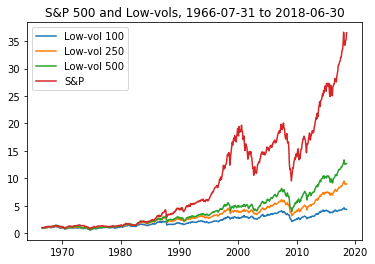

In [18]:
plt.plot(dates_month[36:],portvsa)
plt.plot(dates_month[36:],portvsb)
plt.plot(dates_month[36:],portvsc)
plt.plot(dates_month[36:],snp)
plt.legend(['Low-vol 100','Low-vol 250','Low-vol 500','S&P'])
plt.title('S&P 500 and Low-vols, %.10s to %.10s'%(dates_month[36],dates_month[-1]))
plt.show()

In [84]:
# checking different deciles
decile_lst = []
for i in range(10):
    start_time = time.time()
    decile_lst.append(ew_rebalancing(1,36,[1000,1000,[int(i*100),int((i+1)*100)]],show_record=False))
    print('%d Done.Time used:%d'%(i,time.time()-start_time))

0 Done.Time used:135
1 Done.Time used:136
2 Done.Time used:132
0
0
3 Done.Time used:132
0
0
0
0
0
0
0
0
0
0
0
4 Done.Time used:137
0
0
5 Done.Time used:129
0
0
6 Done.Time used:130
7 Done.Time used:144
0
8 Done.Time used:157
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
9 Done.Time used:153


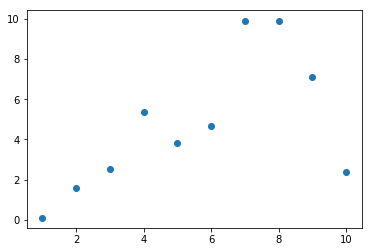

In [86]:
# Relative Returns
plt.scatter([1,2,3,4,5,6,7,8,9,10],[decile_lst[i][2][-1]/decile_lst[i][2][0] for i in range(10)])
plt.show()

In [88]:
decile_lst[0][2]

[1000000,
 899372.9423203447,
 886189.0723668449,
 901842.1597938809,
 908268.3388563553,
 910991.7334226632,
 972471.4916797451,
 973528.5037179186,
 1006485.00899498,
 1018454.4293616081,
 976942.0609481967,
 993297.9061440668,
 1045037.6102185393,
 1030421.7686579241,
 1053110.8584533795,
 1005871.889591173,
 991131.1890591407,
 1024723.1945936541,
 969136.3401782949,
 925733.7541087113,
 923783.7333211683,
 986148.3846178274,
 999201.30544656,
 998169.8917389764,
 980181.2645198659,
 978055.3945985761,
 1025110.8774680069,
 1024258.5708194259,
 1051018.0762070876,
 1020989.2491174802,
 983665.5999782853,
 904002.8159310564,
 912708.246416648,
 897427.0536381418,
 880682.4102233112,
 744376.9702030568,
 696845.2713024628,
 727161.036007804,
 714258.7885892706,
 756417.5369936784,
 724662.480393039,
 714088.8860083573,
 665028.5348564237,
 698507.1829193527,
 692131.9461446877,
 627218.8282128937,
 557221.9282794361,
 536572.5591751881,
 564443.2948602575,
 577258.285147332,
 586374.

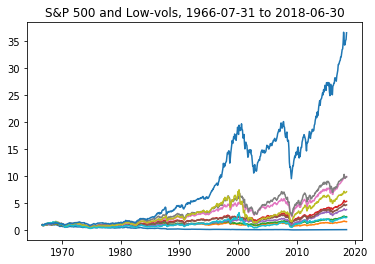

In [91]:

for i in range(10):
    decile_lst[i][2] = np.array(decile_lst[i][2])/decile_lst[i][2][0]
    plt.plot(dates_month[36:],decile_lst[i][2])
plt.plot(dates_month[36:],snp)
#plt.legend(['Low-vol 100','Low-vol 250','Low-vol 500','S&P'])
plt.title('S&P 500 and Low-vols, %.10s to %.10s'%(dates_month[36],dates_month[-1]))
plt.show()

In [112]:
a = vw_rebalancing(1,36,[1000,500,[0,100]])
(a['Mkt Cap']/sum(a['Mkt Cap'])).values

array([0.001445  , 0.00269675, 0.00376456, 0.00156821, 0.01222729,
       0.00368731, 0.00123307, 0.01794589, 0.00466001, 0.00481537,
       0.00346219, 0.00384576, 0.01560549, 0.01554581, 0.00111312,
       0.00523584, 0.00205833, 0.00087124, 0.00110833, 0.00104182,
       0.01373989, 0.01058211, 0.01639845, 0.01088453, 0.00167048,
       0.00083352, 0.00114974, 0.00115141, 0.00326284, 0.0061852 ,
       0.00128993, 0.00106877, 0.00249244, 0.00567556, 0.00217863,
       0.00815529, 0.00749671, 0.00368568, 0.0092439 , 0.00499861,
       0.00235363, 0.0012677 , 0.012293  , 0.00515114, 0.07682716,
       0.00743859, 0.0021619 , 0.02902885, 0.00136139, 0.00147417,
       0.00137775, 0.00353021, 0.03675744, 0.00164131, 0.00145546,
       0.00274841, 0.00503696, 0.00129774, 0.00131313, 0.00089021,
       0.00087963, 0.00534427, 0.02103924, 0.00254017, 0.00508853,
       0.00088838, 0.00756323, 0.00369581, 0.00519374, 0.00087268,
       0.00241196, 0.00169563, 0.00224658, 0.00166453, 0.03022